# XGB Using XAI

### 1. Tree Visualization
### 2. Feature Importance
### 3. Partial Dependence Plot (PDP)

In [27]:
from numpy import loadtxt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.shape

(768, 9)

In [3]:
x = data.drop('Outcome', axis=1)
y = data['Outcome']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [4]:
model = XGBClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

acc = accuracy_score(y_test, y_pred)
print('Accuracy : %.2f' %(acc*100))

Accuracy : 74.03


In [7]:
value = [1, 161, 72, 35, 0, 28.1, 0.527, 20]
value = np.array(value, ndmin=2)

l = model.predict_proba(value)
print(l)
print('No diabetes : {:.2%} \nYes diabetes : {:.2%}'.format(l[0][0], l[0][1]))

[[0.6501031  0.34989688]]
No diabetes : 65.01% 
Yes diabetes : 34.99%


### 1.  Tree Visualization

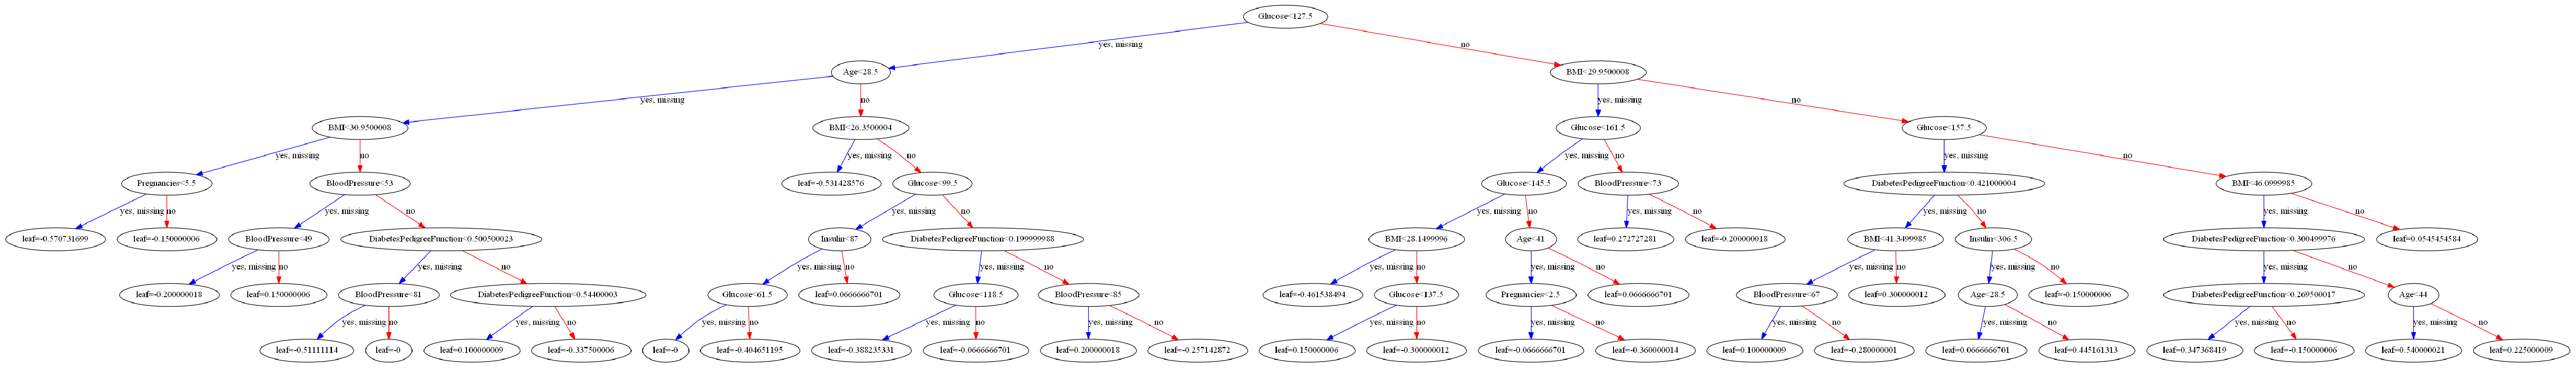

In [35]:
%matplotlib inline
import os
from xgboost import plot_tree
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

os.environ['PATH'] += (os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/')  #환경변수 추가
rcParams['figure.figsize'] = 100,200
plot_tree(model)
plt.show()

<Figure size 720x1440 with 0 Axes>

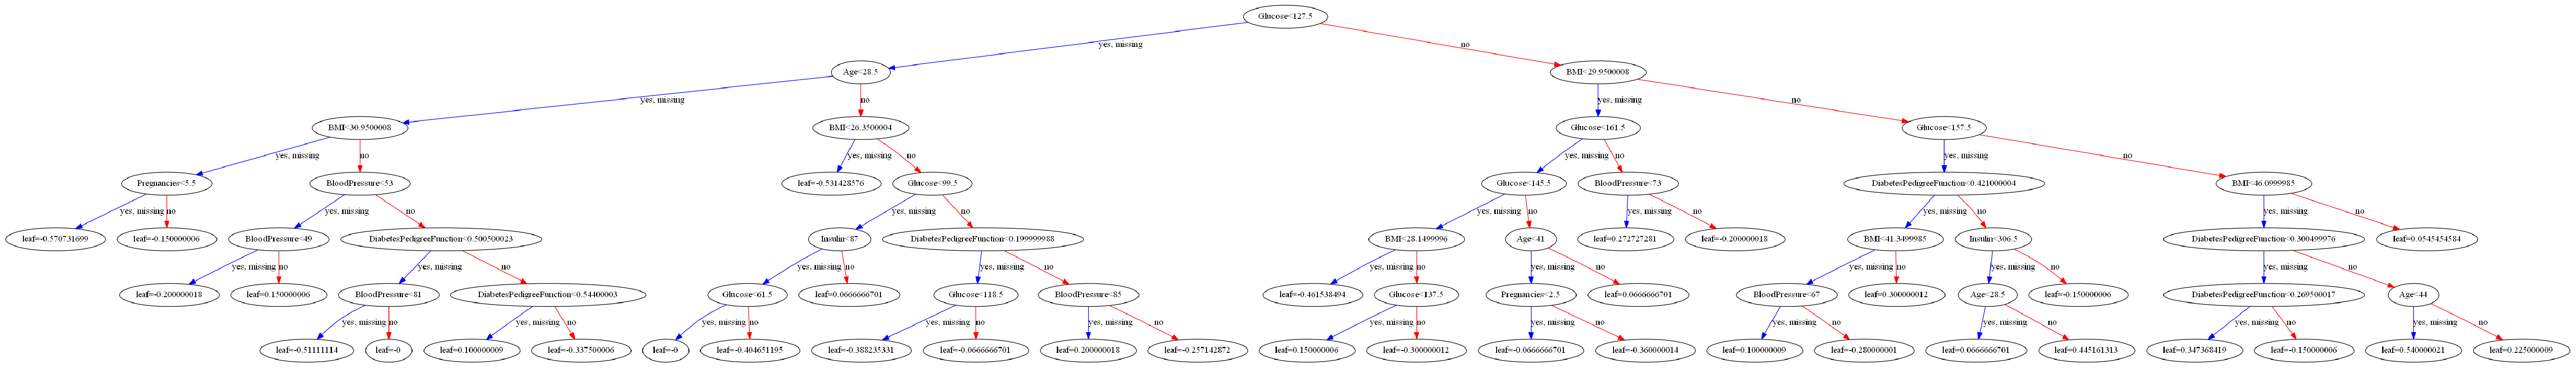

In [37]:
os.environ['PATH'] += (os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/')  #환경변수 추가
plt.figure(figsize = (10,20))
plot_tree(model)
plt.show()

최상단 노드에서 묻는 것이 정보 이득량이 가장 많다는 것을 간접적으로 시사

### 2. Feature Importance

- feature 간 의존성 낮아야 함

<Figure size 720x720 with 0 Axes>

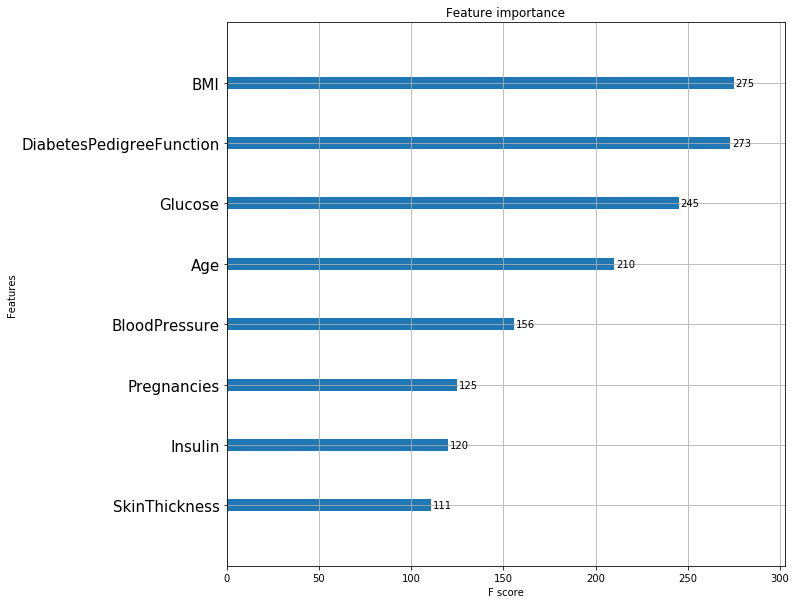

In [10]:
from xgboost import plot_importance

plt.figure(figsize=(10,10))
plot_importance(model)
plt.yticks(fontsize=15)
plt.show()

모델의 parameter(max_depth, ...)가 바뀌면 중요도가 변할 수 있다. </br>

=> feature importance가 모델의 판단 기준 우선순위는 아니다.

### 3. Partial Dependenc Plot (PDP - 부분 의존성 플랏)

- feature 간 dependence plot, 예측에 대한 dependence plot, feature간 partial dependence 등고선 비교 등이 가능

In [9]:
!pip install pdpbox

  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758243 sha256=a0bbab8da5948564fbb32c11ec25a4e9b2e49823dd813e991ad202a2efb7a0f7
  Stored in directory: c:\users\junmin\appdata\local\pip\cache\wheels\f4\d0\1a\b80035625c53131f52906a6fc4dd690d8efd2bf8af6a4015eb
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1321 sha256=a62775921fa2c86b0ab49522384b1efda8b6295c9576b510334aa05786e8948a
  Stored in directory: c:\users\junmin\appdata\local\pip\cache\wheels\46\ef\c3\157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built pdpbox sklearn


You should consider upgrading via the 'c:\users\junmin\anaconda3\python.exe -m pip install --upgrade pip' command.


In [14]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
from pdpbox import info_plots

pima_data = data
pima_features = data.columns[:8]
pima_target = data.columns[8]

#### Target Plot
- 학습 데이터를 분석하여 모델이 어떻게 학습할 것인지 예측하는 기법 <br/>
  => 학습한 모델을 파라미터로 받지 않는다

C:\Users\Junmin\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Junmin\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Junmin\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


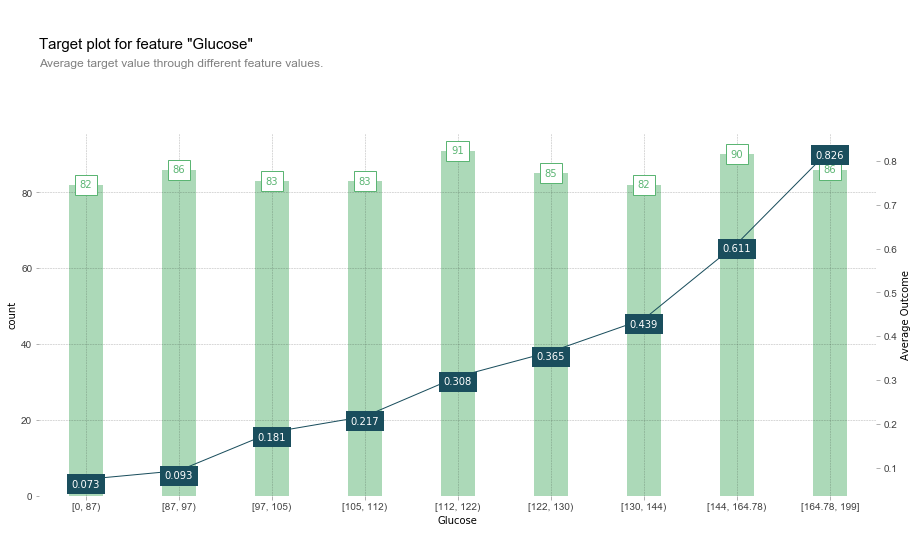

In [15]:
fig, axes, summary_df = info_plots.target_plot(df = pima_data,
                                              feature = 'Glucose',
                                              feature_name = 'Glucose',
                                              target = pima_target)

x축 : glucose 수치  
왼쪽 y축 : 각 구간별 데이터 수  
오른쪽 y축 : 당뇨병 진단 여부

C:\Users\Junmin\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Junmin\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Junmin\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


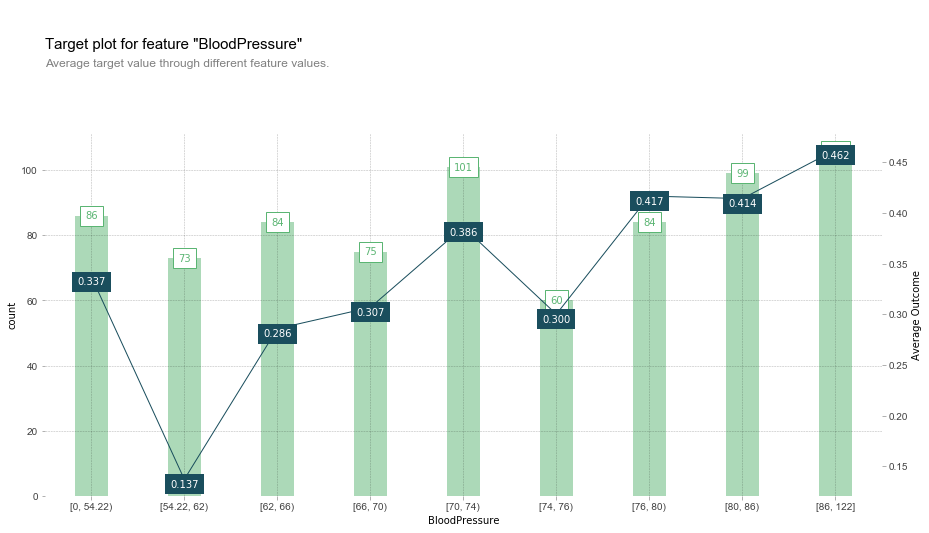

In [16]:
fig, axes, summary_df = info_plots.target_plot(df = pima_data,
                                              feature = 'BloodPressure',
                                              feature_name = 'BloodPressure',
                                              target = pima_target)

당뇨병과 고혈압(80 - 120mmHg 이상)은 상관관계가 있다고 밝혀져 있지만,  
혈압 feature 만으로 당뇨 진단은 불가능하다고 판단 가능

In [17]:
summary_df

,x,display_column,value_lower,value_upper,count,Outcome
0,0,"[0, 54.22)",0.000000,54.222222,86,0.337209
1,1,"[54.22, 62)",54.222222,62.000000,73,0.136986
2,2,"[62, 66)",62.000000,66.000000,84,0.285714
3,3,"[66, 70)",66.000000,70.000000,75,0.306667
4,4,"[70, 74)",70.000000,74.000000,101,0.386139
5,5,"[74, 76)",74.000000,76.000000,60,0.300000
6,6,"[76, 80)",76.000000,80.000000,84,0.416667
7,7,"[80, 86)",80.000000,86.000000,99,0.414141
8,8,"[86, 122]",86.000000,122.000000,106,0.462264


#### Prediction Distribution Plot (예측 분포 플랏)
- 데이터와 실제 모델의 결과가 일치하는지 확인

C:\Users\Junmin\Anaconda3\lib\site-packages\pdpbox\info_plots.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info_df['actual_prediction'] = prediction[:, 1]
C:\Users\Junmin\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
C:\Users\Junmin\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future ver

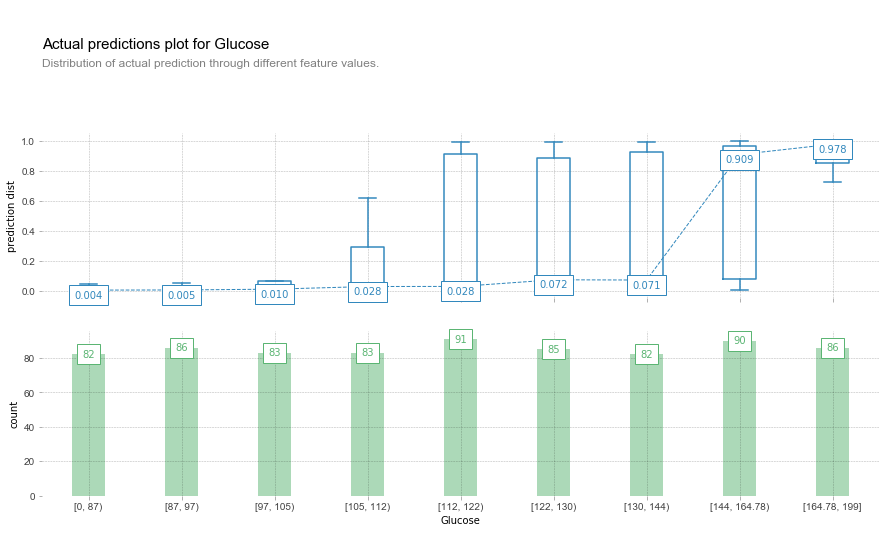

In [22]:
fig, axes, summary_df = info_plots.actual_plot(model=model,
                                              X = pima_data[pima_features],
                                              feature = 'Glucose',
                                              feature_name = 'Glucose',
                                              predict_kwds = {})

[0, 87) 구간에서 머신러닝 학습 결과가 glucose만 사용했을 때보다 당뇨병 존재 가능성이 낮아졌다 (0.4% < 7.3%)  
즉, 해당 구간의 glucose 수치는 당뇨병을 진단하는데 음의 상관관계를 가진다고 할 수 있다.  
  
반대로, glucose 수치가 가장 높은 구간에서는 머신러닝 학습 결과가 glucose만 사용했을 때보다 당뇨병 존재 가능성이 높아졌다 (97.8% > 82.6%)  
즉, 해당 구간의 glucose 수치는 당뇨병을 진단하는데 양의 상관관계를 가진다고 할 수 있다.

#### PDP Plot

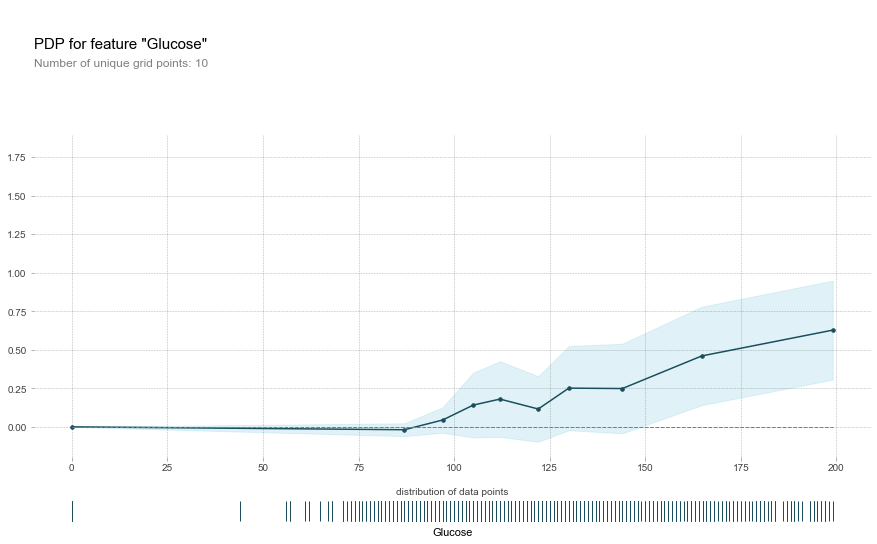

In [26]:
from pdpbox import pdp

pdp_gc = pdp.pdp_isolate(model = model,
                        dataset = pima_data,
                        model_features = pima_features,
                        feature = 'Glucose')

fig, axes = pdp.pdp_plot(pdp_gc,
                        'Glucose',
                        plot_lines = False,
                        frac_to_plot = 0.5,
                        plot_pts_dist = True)

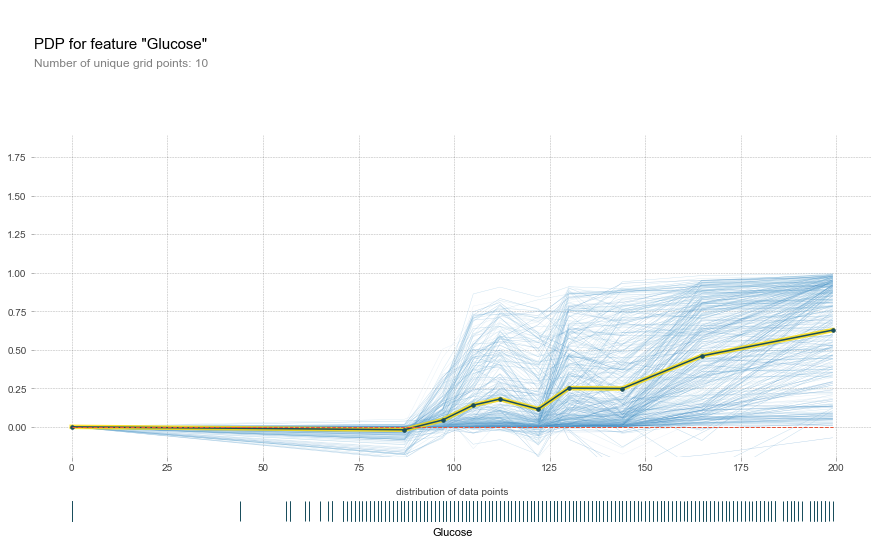

In [32]:
fig, axes = pdp.pdp_plot(pdp_gc,
                        'Glucose',
                        plot_lines = True,
                        frac_to_plot = 0.5,
                        plot_pts_dist = True)

#### 두 feature에 대한 Plot

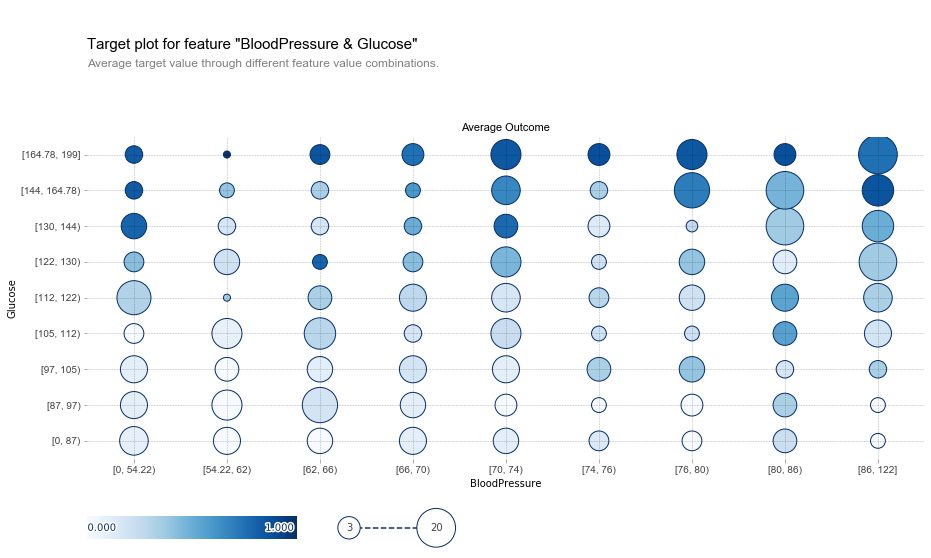

In [28]:
fig, axes, summary_df = info_plots.target_plot_interact(df = pima_data,
                                                       features = ['BloodPressure', 'Glucose'],
                                                       feature_names = ['BloodPressure', 'Glucose'],
                                                       target = pima_target)

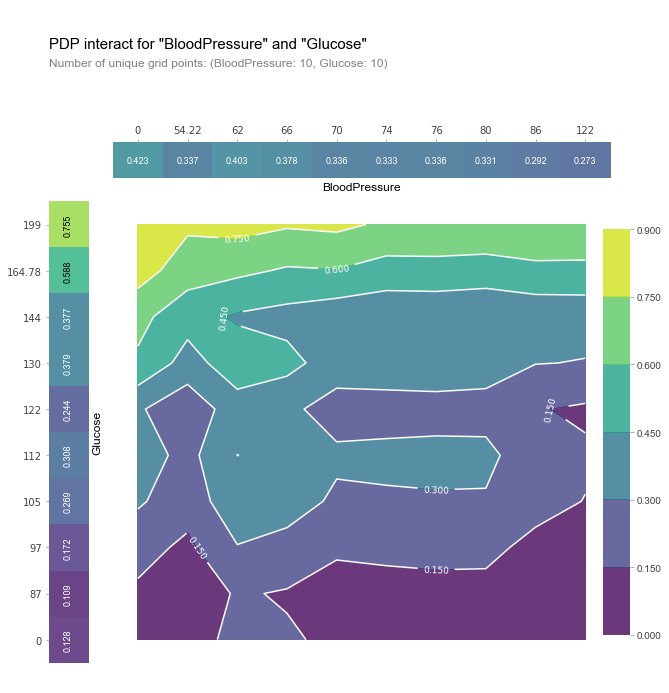

In [30]:
pdp_interaction = pdp.pdp_interact(model = model,
                                  dataset = pima_data,
                                  model_features = pima_features,
                                  features = ['BloodPressure', 'Glucose'])

fig, axes = pdp.pdp_interact_plot(pdp_interact_out = pdp_interaction,
                                 feature_names = ['BloodPressure', 'Glucose'],
                                 plot_type = 'contour',
                                 x_quantile = True,
                                 plot_pdp = True)

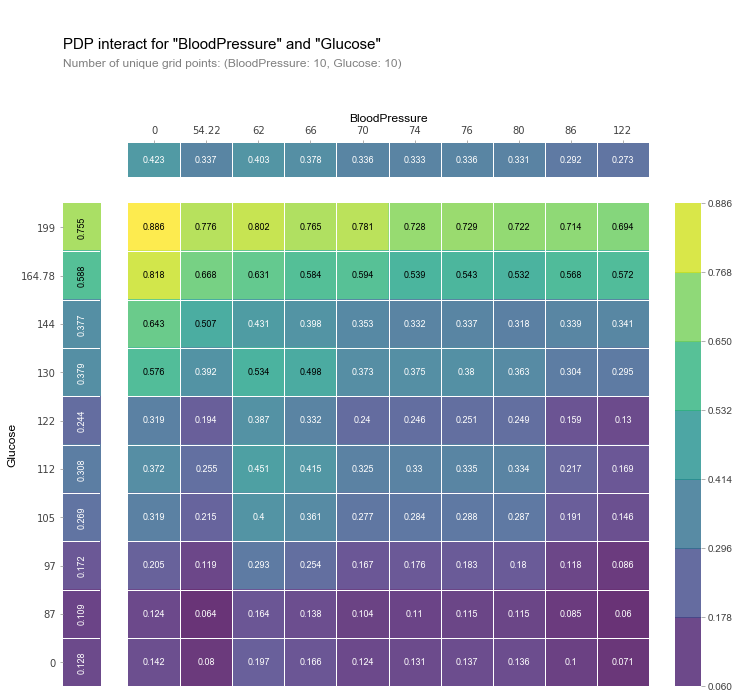

In [31]:
fig, axes = pdp.pdp_interact_plot(pdp_interact_out = pdp_interaction,
                                 feature_names = ['BloodPressure', 'Glucose'],
                                 plot_type = 'grid',
                                 x_quantile = True,
                                 plot_pdp = True)

가상의 y = x 선을 그었을 때, 가상의 선에 비례하여 당뇨병 진단 가능성이 높아지면, 혈압과 glucose feature가 모델에 주는 영향이 비슷하다고 해석 가능  
  
위의 그림에서는 glucose가 더 민감한 것을 확인 가능

#### Target Plot과 PDP가 상충될 때

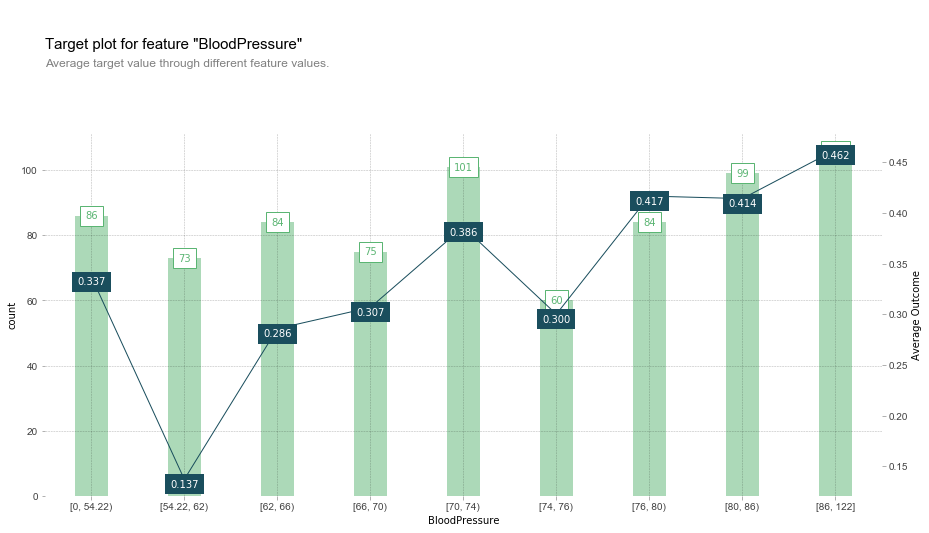

In [33]:
fig, axes, summary_df = info_plots.target_plot(df = pima_data,
                                              feature = 'BloodPressure',
                                              feature_name = 'BloodPressure',
                                              target = pima_target)

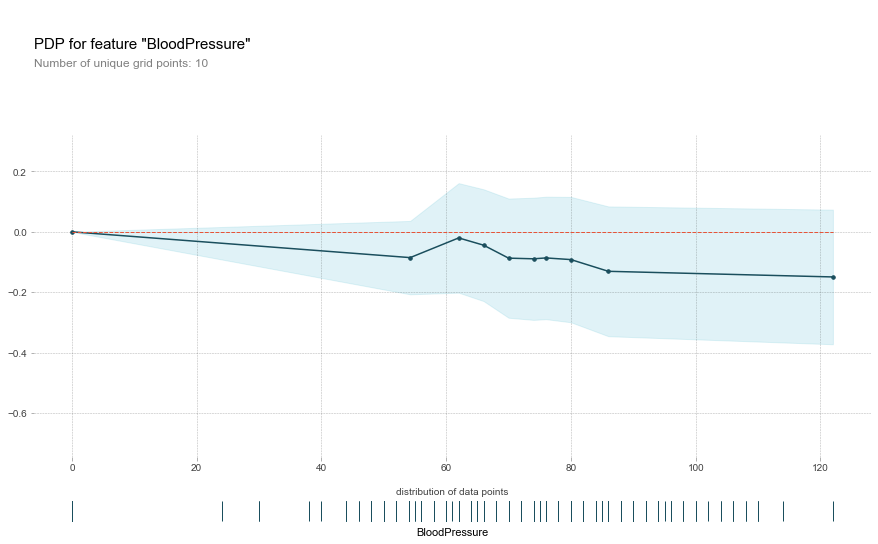

In [34]:
pdp_gc = pdp.pdp_isolate(model = model,
                        dataset = pima_data,
                        model_features = pima_features,
                        feature = 'BloodPressure')

fig, axes = pdp.pdp_plot(pdp_gc,
                        'BloodPressure',
                        plot_lines = False,
                        frac_to_plot = 0.5,
                        plot_pts_dist = True)

Target Plot을 확인했을 때, 혈압은 어느정도 양의 영향력을 미치지만, PDP를 확인하면 음의 영향을 미친다.  
  
의학적으로 당뇨병은 70%의 확률로 고혈압을 동반한다.  
하지만 정상기의 혈압의 데이터만 주어졌다.  
정상기의 혈압은 모델에 음의 영향을 미치는 것이다.

#### 결과를 너무 맹신하지 말고 해석에 주의해야 한다.